<a href="https://colab.research.google.com/github/fowardelcac/Titanic_2.0/blob/main/Datasets_originales/Procesamiento/Procesar_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/fowardelcac/Titanic_2.0.git

fatal: destination path 'Titanic_2.0' already exists and is not an empty directory.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.impute import KNNImputer

In [65]:
df = pd.read_csv('/content/Titanic_2.0/Datasets_originales/train.csv')
df = df.drop(['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis = 1)

# Age

<Axes: xlabel='Age', ylabel='Count'>

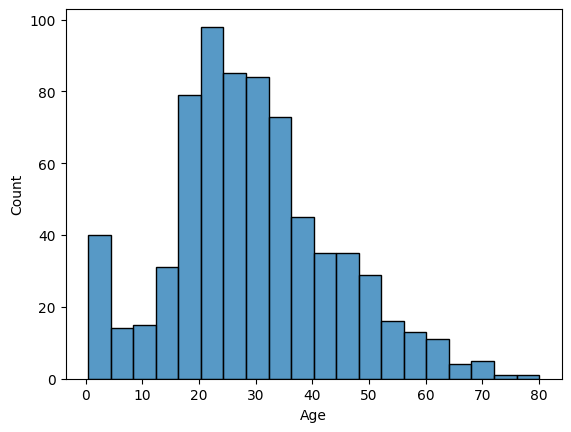

In [9]:
sns.histplot(data = df, x = 'Age')

In [38]:
imputer = KNNImputer(n_neighbors=5)
df['Age_KNN']  = imputer.fit_transform(df.Age.values.reshape(-1, 1)).astype(int)

In [39]:
df['Age'].describe(), df['Age_KNN'].describe()

(count    714.000000
 mean      29.699118
 std       14.526497
 min        0.420000
 25%       20.125000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: Age, dtype: float64,
 count    891.000000
 mean      29.544332
 std       13.013778
 min        0.000000
 25%       22.000000
 50%       29.000000
 75%       35.000000
 max       80.000000
 Name: Age_KNN, dtype: float64)

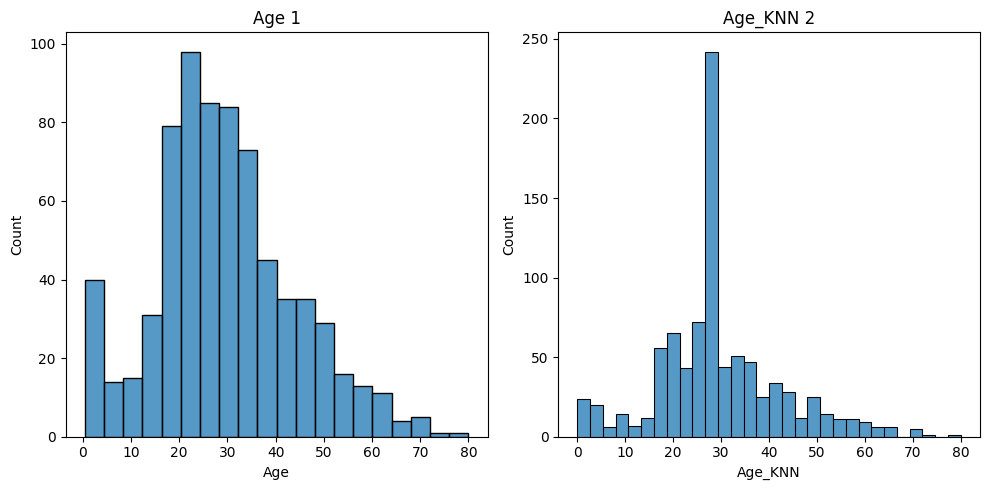

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df.Age, ax=axs[0])
axs[0].set_title('Age 1')
sns.histplot(df.Age_KNN, ax=axs[1])
axs[1].set_title('Age_KNN 2')
plt.tight_layout()
plt.show()

In [42]:
df = df.drop('Age_KNN', axis=1)

In [66]:
df['Age_imp'] = df['Age'].fillna(pd.Series(np.random.choice(df['Age'].dropna(), size=len(df['Age'].isna()))))

# Reemplazar la columna original 'Age' con la columna 'Age_imp'
df['Age'] = df['Age_imp']

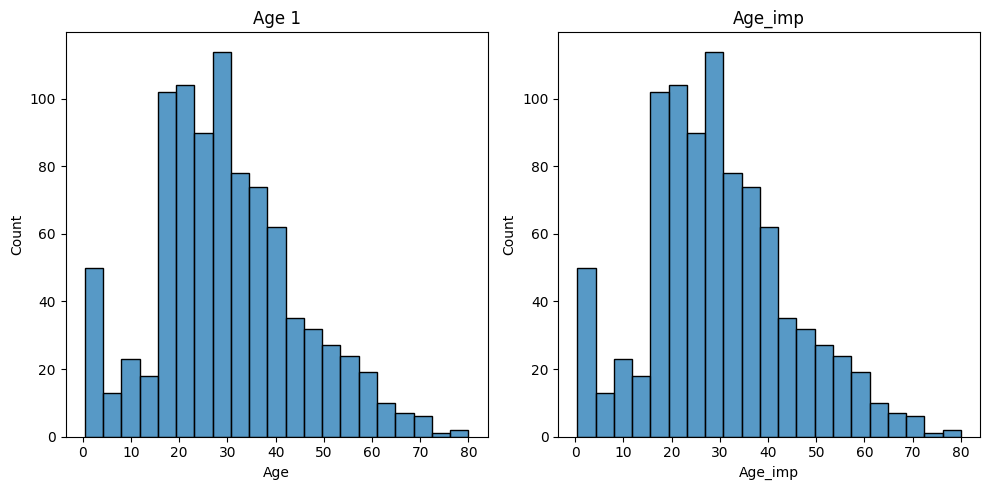

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df.Age, ax=axs[0])
axs[0].set_title('Age 1')
sns.histplot(df.Age_imp, ax=axs[1])
axs[1].set_title('Age_imp')
plt.tight_layout()
plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Age_imp      891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [70]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Age_imp
0,1,0,3,male,22.0,1,0,22.0
1,2,1,1,female,38.0,1,0,38.0
2,3,1,3,female,26.0,0,0,26.0
3,4,1,1,female,35.0,1,0,35.0
4,5,0,3,male,35.0,0,0,35.0


# PClass

<Axes: >

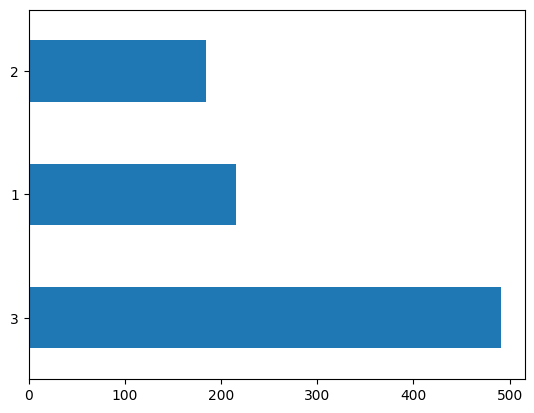

In [71]:
df.Pclass.value_counts().plot(kind='barh')

# Sex

In [72]:
mapeo = {'male': 0, 'female': 1}
df.Sex = df.Sex.map(mapeo)

In [75]:
df = df.drop('Age_imp', axis=1)

In [77]:
df.to_csv('/content/Titanic_2.0/Datasets_originales/Procesamiento/train_procesado.csv')